# sample generator for when, why, what
This notebook is for creating the random sample .txt files for the experiment.

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl 

 ## Contents
 1. [Create separate file with contexts](#Create-separate-file-with-contexts)
 2. [Create separate file without contexts](#Create-separate-file-without-contexts)
 3. [Creating the files for the experiment](#Creating-files-for-the-experiment)
 4. [Automate Paraphrase Generator](#Automate-pharaphrase-generator)


In [2]:
# import the database file from the TGrep2 searching
df = pd.read_csv("../results/swbd.tab", sep='\t', engine='python')

In [10]:
# This makes the display show more info
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

# Creating the files for the experiment

## Constrain dataset
for experimental mock-up

First we have to remove the questions that we don;t want to include:
1. non-embedded or root questions
2. no degree questions
3. no identity questions
4. generally only monomorphemic wh-phrases
5. only what-, when-, and why-questions

In [338]:
# distribution before 

In [339]:
df.columns

Index(['Item_ID', 'Sentence', 'HaveNeedTo', 'Finite', 'ModalPresent',
       'QuestionType', 'DegreeQ', 'SubjectAuxInv', 'WhAll', 'MatrixNegPresent',
       'EmbeddedNegPresent', 'SbarNomPresent', 'QuantifiedSubject',
       'QuantifiedPredicate', 'Wh', 'MatrixNegation', 'InvertedAuxVerb',
       'MatrixPredAux', 'MatrixPredVerb', 'MatrixPredOther',
       'MatrixPredParticle', 'MatrixPred2', 'Modal', 'EmbeddedNegation',
       'Verb1', 'Verb2', 'Verb3', 'DeterminerSubject', 'DeterminerNonSubject',
       'FullWhPhrase', 'JustMatrixClause', 'DeterminerSubjPresent',
       'DeterminerNonSubjPresent', 'WhNode', 'WhParse', 'Question',
       'SentenceParse', 'WhPhaseType', 'IdentityQ'],
      dtype='object')

In [4]:
df.groupby(["QuestionType"])["QuestionType"].count()

QuestionType
adjunct         775
cleft           650
embadjunct     2418
embedded       1692
exclamation      34
fragment        126
relative       1378
root           1719
subject        1406
Name: QuestionType, dtype: int64

In [26]:
df.pivot_table(index=['QuestionType'], values="Question", aggfunc=len).groupby(["QuestionType"]).Question.transform(lambda x: x/len(df)*100).reset_index()

,QuestionType,Question
0,adjunct,7.598784
1,cleft,6.373174
2,embadjunct,23.708207
3,embedded,16.589862
4,exclamation,0.333366
5,fragment,1.235415
6,relative,13.511129
7,root,16.854594
8,subject,13.785665


In [27]:
# combine adj + embadj + subject together as "adjunct"
(.075988 + 0.237082 + 0.137857)*100

45.092699999999994

In [42]:
df[df['QuestionType'] == 'root'].groupby(["Wh"])["Wh"].count()

Wh
how            381
what           991
whatever         1
when            17
where          151
whereabouts      1
which           19
who             83
whose            2
why             73
Name: Wh, dtype: int64

In [65]:
ct = critical.pivot_table(index=['Wh','ModalPresent'], values='Sentence', aggfunc=len).groupby(['Wh']).Sentence.transform(lambda x: x/len(critical)).reset_index()

In [66]:
ct

,Wh,ModalPresent,Sentence
0,how,no,0.156784
1,how,yes,0.028141
2,what,no,0.520603
3,what,yes,0.067337
4,when,no,0.014070
5,when,yes,0.001005
6,where,no,0.093467
7,where,yes,0.004020
8,who,no,0.046231
9,who,yes,0.008040


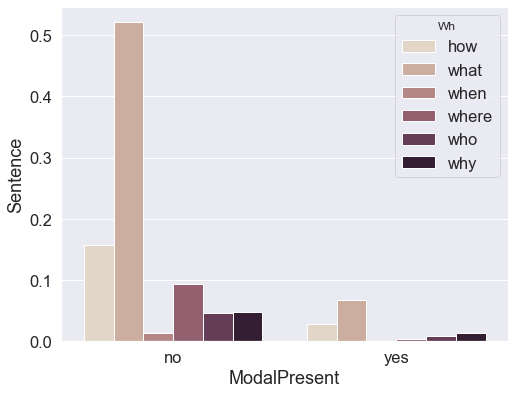

In [67]:
sns.set(font_scale=1.5)
fig_dims = (8, 6)
fig, ax = plt.subplots(figsize=fig_dims)
g = sns.barplot(x="ModalPresent", y="Sentence", hue="Wh", palette="ch:.25", data=ct)
plt.subplots_adjust(top=0.9)
# g.fig.suptitle('questType x clauseType x wh')
plt.show()



In [30]:
# this should potentially be embedded....definitely not subject!
df.iloc[220]
# same with 331, 400....477


# should be identity q: 30
# should not be embedded: 233

Item_ID                                                                                                                                                                                                                                                                                                                                                                         3477:32
Sentence                                                                                                                                                                                                                                                                                                          i, i never found out what a lot of the seventies music had *t*-1 too.
HaveNeedTo                                                                                                                                                                                                                                              

In [5]:
critical = df[(df['QuestionType'] == 'root') # only root questions
              & 
              (df['DegreeQ'] == 'no' ) # no degree questions
              &
              (df['IdentityQ'] == "no") # no identity questions
              &
              (df['Wh'].isin(['how','How','where','Where','who','Who','what','What','why','Why','when','When'])) # just these wh-words
              &
              (df['WhPhaseType'] == 'monomorphemic') # monomorphic wh only (might get anything not go by degQ)
             ]

In [19]:
critical[critical['Wh'] == 'what'].Sentence

15                                                                                                                                                                                                                                          what did you wear *t*-1 to work today?
16                                                                                                                                                                                                                                            what did i wear *t*-1 to work today?
117                                                                                                                                                                                                                                         what do you mean *t*-1 by world music?
126                                                                                                                                                                            

In [343]:
len(critical)

995

In [344]:
# Number of lists (30 items per list)
len(critical)/30

33.166666666666664

In [345]:
995 - 33*30

5

33 lists of 30, 1 list of 35

In [346]:
critical.pivot_table(index=['ModalPresent'], values="Question", aggfunc=len).groupby(["ModalPresent"]).Question.transform(lambda x: x/len(critical)).reset_index()

,ModalPresent,Question
0,no,0.878392
1,yes,0.121608


In [347]:
critical.pivot_table(index=['Wh'], values="Question", aggfunc=len).groupby(["Wh"]).Question.transform(lambda x: x/len(critical)).reset_index()

,Wh,Question
0,how,0.184925
1,what,0.587940
2,when,0.015075
3,where,0.097487
4,who,0.054271
5,why,0.060302


In [348]:
critical.pivot_table(index=['Wh','ModalPresent'], values="Question", aggfunc=len).groupby(["Wh"]).Question.transform(lambda x: x/len(critical)*100).reset_index()

,Wh,ModalPresent,Question
0,how,no,15.678392
1,how,yes,2.814070
2,what,no,52.060302
3,what,yes,6.733668
4,when,no,1.407035
5,when,yes,0.100503
6,where,no,9.346734
7,where,yes,0.402010
8,who,no,4.623116
9,who,yes,0.804020


## Paraphrase Generator
this should take as input the entire constrained dataframe from the above section, and then generate the paraphrases

For Who questions: Who is a person...? / Who is some person...? / "Who is every person..." / "Who is the person..."

In [83]:
# read in df with contexts
cntxts = pd.read_csv("swbd_contexts.csv")

In [69]:
cntxts = cntxts.drop(columns="FollowingContext")

In [70]:
# get the indixes from critical
crit_index = critical.Item_ID

Merge back in Wh and ModalPresent colums

In [71]:
df_WhMod = critical[["Item_ID","Wh","ModalPresent"]].rename(columns={"Item_ID": "TGrepID"})

In [73]:
# subset to the items that are just the ones filtered in the previos section

# otherwise, if using the database file with contexts directly in there, then this step
# is not necessary
df_valid = cntxts[cntxts["TGrepID"].isin(set(crit_index))]

In [74]:
len(df_valid)

995

In [79]:
df_valid.columns

Index(['TGrepID', 'EntireSentence', 'PreceedingContext', 'Wh', 'ModalPresent'], dtype='object')

In [76]:
df_valid = df_valid.merge(df_WhMod, how = 'inner', indicator=False)

In [356]:
len(df_valid)

995

In [97]:
cntxts[cntxts["TGrepID"]=="143033:4"]

,TGrepID,EntireSentence,PreceedingContext,FollowingContext
8021,143033:4,where have you been *t*-1?,"###speakera11.###uh-huh.###speakerb12.###but, um, i guess 0 my favorite is probably switzerland and ireland.###speakera13.###uh-huh.###yeah###well, i've been over there too.###speakerb14.###uh-huh.","###speakera15.###i even.###* let's see, um,###mostly germany and france.###speakerb16.###uh-huh.###speakera17.###i lived in france for a year and a half###so i was able,###speakerb18."


In [323]:
df_valid.pivot_table(index=['Wh'], values="EntireSentence", aggfunc=len).groupby(["Wh"]).EntireSentence.transform(lambda x: x/len(df_valid)).reset_index()

,Wh,EntireSentence
0,how,0.184925
1,what,0.587940
2,when,0.015075
3,where,0.097487
4,who,0.054271
5,why,0.060302


In [357]:
who = df_valid[df_valid["Wh"] == "who"]
where = df_valid[df_valid["Wh"] == "where"]
how = df_valid[df_valid["Wh"] == "how"]
when = df_valid[df_valid["Wh"] == "when"]
why = df_valid[df_valid["Wh"] == "why"]
what = df_valid[df_valid["Wh"] == "what"]

In [358]:
who["AResponse"] = "Who is a person...?"
# who["SomeResponse"] = "Who is some person...?"
who["AllResponse"] = "Who is every person...?"
who["TheResponse"] = "Who is the person...?"


where["AResponse"] = "What is a place...?"
# where["SomeResponse"] = "What is some place...?"
where["AllResponse"] = "What is every place...?"
where["TheResponse"] = "What is the place...?"


how["AResponse"] = "What is a way...?"
# how["SomeResponse"] = "What is some way...?"
how["AllResponse"] = "What is every way...?"
how["TheResponse"] = "What is the way...?"

when["AResponse"] = "What is a time...?"
# when["SomeResponse"] = "What is some time...?"
when["AllResponse"] = "What is every time...?"
when["TheResponse"] = "What is the time...?"


why["AResponse"] = "What is a reason...?"
# why["SomeResponse"] = "What is some reason...?"
why["AllResponse"] = "What is every reason...?"
why["TheResponse"] = "What is the reason...?"


what["AResponse"] = "What is a thing...?"
# what["SomeResponse"] = "What is some thing...?"
what["AllResponse"] = "What is every thing...?"
what["TheResponse"] = "What is the thing...?"

<ipython-input-358-bf84b428f8ef>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who["AResponse"] = "Who is a person...?"
<ipython-input-358-bf84b428f8ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who["AllResponse"] = "Who is every person...?"
<ipython-input-358-bf84b428f8ef>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [385]:
df_final = pd.concat([who,where,how,why,when,what])

In [360]:
len(df_final)

995

In [97]:
df_final.pivot_table(index=['Wh'], values="EntireSentence", aggfunc=len).groupby(["Wh"]).EntireSentence.transform(lambda x: x/len(df_final)).reset_index()

,Wh,EntireSentence
0,how,0.184925
1,what,0.587940
2,when,0.015075
3,where,0.097487
4,who,0.054271
5,why,0.060302


In [98]:
df_final.pivot_table(index=['ModalPresent'], values="EntireSentence", aggfunc=len).groupby(["ModalPresent"]).EntireSentence.transform(lambda x: x/len(df_final)).reset_index()

,ModalPresent,EntireSentence
0,no,0.878392
1,yes,0.121608


## Controls

In [361]:
controls = pd.read_csv("../../experiments/clean_corpus/controls.csv")

In [362]:
controls["Wh"] = "none"
controls["ModalPresent"] = "no"

In [363]:
controls = controls[["TGrepID","EntireSentence","PreceedingContext","Wh","ModalPresent","AResponse","AllResponse","TheResponse"]]

## Create randomly sampled files

### TEST SAMPLE

In [327]:
len(df_final)/32

31.09375

In [141]:
# 32 lists of 30, 1 list of 35
30*32 +35

995

#### For Modal Balancing:
- Lists 1-29: 4
    - List 1-15: 4
    - List 16-29: 4
- List 30-32: 1
- List 33: 2

In [144]:
df_final.groupby(["ModalPresent"])["ModalPresent"].count()

ModalPresent
no     874
yes    121
Name: ModalPresent, dtype: int64

Modals

In [145]:
121/33

3.6666666666666665

In [161]:
# modal leftovers
121 - 4*29

5

### For Wh Balancing

In [306]:
df_final.groupby(["Wh"])["Wh"].count()

Wh
how      184
what     585
when      15
where     97
who       54
why       60
Name: Wh, dtype: int64

#### When:
- List 1-15: 1

#### Who:
- List 1-15: 2
- List 15-21: 2
- List 22-33: 1

In [189]:
54/33

1.6363636363636365

In [197]:
21*2 + 12

54

#### Why:
- List 1-15: 2
- List 16-21: 2
- List 22-27: 2
- List 28-33: 1

In [199]:
60/33

1.8181818181818181

In [205]:
27*2 + 6

60

#### Where:
- List 1-15: 3
- List 16-31: 3
- List 32-33: 2

In [208]:
97/33

2.9393939393939394

In [212]:
31*3 + 2*2

97

#### How:
- List 1-15: 6
- List 16-27: 6
- List 28-31: 4
- List 32-33: 3

In [264]:
27*6 + 4*4 + 2*3

184

#### What: 
- Lists 1-15: 16
- List 16-29: 18**
- Lists 30-32: 16**
- List 33: 15**

In [328]:
29*18+3*16+1*15

585

In [330]:
15*16 + 6*17 + 6*18 + 2*21 + 2*21 + 1*23 + 1*28

557

In [331]:
585-557

28

Lists 1-15 (30):
    1 when
    2 who
    2 why
    3 where
    6 how
    16 what

List 16-21 (30):
    0 when
    2 who
    2 why
    3 where
    6 how
    17 what


List 22-27 (30):
    0 when
    1 who
    2 why
    3 where
    6 how
    18 what

List 28-29 (30):
    0 when
    1 who
    1 why
    3 where
    4 how
    21 what

List 30-31 (30):
    0 when
    1 who
    1 why
    3 where
    4 how
    21 what

List 32 (30):
    0 when
    1 who
    1 why
    2 where
    3 how
    23 what

List 33 (35):
    1 who
    1 why
    2 where
    3 how
    28 what


In [398]:
df_final = pd.concat([who,where,how,why,when,what])

In [399]:
for n in range(1,16):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(4)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    j = len(mod_sample[mod_sample["Wh"] == "when"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    when_sample = df_final[df_final["Wh"] == "when"].sample(1-j)
    df_final = df_final.drop(when_sample.index)  

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(6-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(16-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,when_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

38

In [400]:
len(df_final)

545

In [396]:
df_final.groupby(["Wh"])["Wh"].count()

Wh
how       94
what     345
where     52
who       24
why       30
Name: Wh, dtype: int64

who
9/2 = 4.5

who
9/2 = 3.5

how
49/2 = 24.5

In [533]:
df_final.groupby(["ModalPresent"])["ModalPresent"].count()

ModalPresent
no     52
yes    13
Name: ModalPresent, dtype: int64

In [506]:
13/2

6.5

Second iteration

In [401]:
for n in range(16,22):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(4)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(6-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(17-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

In [29]:
23+4+3

30

In [402]:
len(df_final)

365

In [107]:
df_final.groupby(["ModalPresent"])["ModalPresent"].count()

ModalPresent
no     874
yes    121
Name: ModalPresent, dtype: int64

In [110]:
995/30

33.166666666666664

In [108]:
df_final.groupby(["Wh"])["Wh"].count()

Wh
how      184
what     585
when      15
where     97
who       54
why       60
Name: Wh, dtype: int64

In [403]:
for n in range(22,28):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(4)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(6-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(18-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

In [ ]:
len(d_final)

In [404]:
for n in range(28,30):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(4)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(4-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(21-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

In [ ]:
len(d_final)

In [405]:
for n in range(30,32):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(1)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(4-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(21-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

In [407]:
len(df_final)

65

In [408]:
for n in range(32,33):
    mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(1)

    i = len(mod_sample[mod_sample["Wh"] == "why"])
    k = len(mod_sample[mod_sample["Wh"] == "what"])
    l = len(mod_sample[mod_sample["Wh"] == "how"])
    m = len(mod_sample[mod_sample["Wh"] == "who"])
    o = len(mod_sample[mod_sample["Wh"] == "where"])
    df_final = df_final.drop(mod_sample.index)

    who_sample = df_final[
        (df_final["Wh"] == "who") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-m)
    df_final = df_final.drop(who_sample.index)    
    
    why_sample = df_final[
        (df_final["Wh"] == "why") &
        (df_final["ModalPresent"] == "no")
    ].sample(1-i)
    df_final = df_final.drop(why_sample.index)
    
    where_sample = df_final[
        (df_final["Wh"] == "where") &
        (df_final["ModalPresent"] == "no")
    ].sample(2-o)
    df_final = df_final.drop(where_sample.index)

    how_sample = df_final[
        (df_final["Wh"] == "how") &
        (df_final["ModalPresent"] == "no")
    ].sample(3-l)
    df_final = df_final.drop(how_sample.index)    
    
    what_sample = df_final[
        (df_final["Wh"] == "what") &
        (df_final["ModalPresent"] == "no")
    ].sample(23-k)
    df_final = df_final.drop(what_sample.index)
    
    total = pd.concat([mod_sample,why_sample,what_sample,how_sample,who_sample,where_sample,controls])

    # save to file
    filename = f"../../experiments/clean_corpus/03_experiment/corpus_{n}.txt".format(n=n)
    total.to_csv(filename,header=True,sep="\t",index=False)

In [410]:
len(df_final)

35

In [411]:
last = pd.concat([df_final,controls])

In [412]:
last.to_csv("../../experiments/clean_corpus/03_experiment/corpus_33.txt",header=True,sep="\t",index=False)

## Pilot Samples

### Pilot1

In [120]:
df_final.pivot_table(index=['Wh'], values="EntireSentence", aggfunc=len).groupby(["Wh"]).EntireSentence.transform(lambda x: x/99).reset_index()

,Wh,EntireSentence
0,how,1.858586
1,what,5.909091
2,when,0.151515
3,where,0.979798
4,who,0.545455
5,why,0.606061


In [121]:
1+5+1+1+1+1

10

In [116]:
995/10

99.5

In [125]:
mod_sample = df_final[df_final["ModalPresent"] == "yes"].sample(1)

i = len(mod_sample[mod_sample["Wh"] == "why"])
j = len(mod_sample[mod_sample["Wh"] == "when"])
k = len(mod_sample[mod_sample["Wh"] == "what"])
l = len(mod_sample[mod_sample["Wh"] == "how"])
m = len(mod_sample[mod_sample["Wh"] == "who"])
n = len(mod_sample[mod_sample["Wh"] == "where"])
df_final = df_final.drop(mod_sample.index)

why_sample = df_final[
    (df_final["Wh"] == "why") &
    (df_final["ModalPresent"] == "no")
                     ].sample(1-i)
df_final = df_final.drop(why_sample.index)

when_sample = df_final[
    (df_final["Wh"] == "when") &
    (df_final["ModalPresent"] == "no")].sample(1-j)
df_final = df_final.drop(when_sample.index)

what_sample = df_final[
    (df_final["Wh"] == "what") &
    (df_final["ModalPresent"] == "no")].sample(5-k)
df_final = df_final.drop(what_sample.index)

how_sample = df_final[
    (df_final["Wh"] == "how") &
    (df_final["ModalPresent"] == "no")
                     ].sample(1-l)
df_final = df_final.drop(how_sample.index)

who_sample = df_final[
    (df_final["Wh"] == "who") &
    (df_final["ModalPresent"] == "no")].sample(1-m)
df_final = df_final.drop(who_sample.index)

where_sample = df_final[
    (df_final["Wh"] == "where") &
    (df_final["ModalPresent"] == "no")].sample(1-n)
df_final = df_final.drop(where_sample.index)


In [128]:
total = pd.concat([mod_sample,why_sample,when_sample,what_sample,how_sample,who_sample,where_sample,controls])

# save to file


In [127]:
total

,TGrepID,EntireSentence,PreceedingContext,Wh,ModalPresent,AResponse,AllResponse,TheResponse
143,25144:43,"and if we can't take it and use it easily, well, how can you put that on, like, elderly people and you know, just people that *t*-1 maybe just aren't blessed with as, as much sharpness and ment-, mental acuity *t*-2,","###really.###speakera29.###or i don't know how much of the you know,###speakerb30.###yeah.###speakera31.###but a large percentage probably over half of the rest of the population they don't have any college probably much at all###speakerb32.###absolutely.###speakera33.",how,yes,What is a way...?,What is every way...?,What is the way...?
142,25048:4,"why do you think 0 it, uh, sounds,","###we have a very good public school up here###and a degree out there means a lot.###it's a very good school.### it's, it's university of vermont.###uh, we also have some two year college.###well, there's a four year colleges.###they all have a pretty good reputation.###but, like you say, you,###speakera1.###okay, uh,",why,no,What is a reason...?,What is every reason...?,What is the reason...?
352,69542:9,"uh, when is your next one, uh, scheduled now *t*-1.","###speakera61.###yeah,###yeah,###it's very pretty country in there i think 0 *t*-1,###it's gorgeous.###speakerb62.###uh-huh,###so.###speakera63.###well i,",when,no,What is a time...?,What is every time...?,What is the time...?
402,78481:16,"by, what do you mean *t*-1 by liberal, um.","###unless you have something 0 *t*-1 to do with it.###speakerb10.###yeah.###speakera11.###right.###speakerb12.###but the problem is, that i am very liberal politically###and so i hardly ever have anybody that *t*-1 wins that i vote for *t*-2.###speakera13.###oh, liberal,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
305,59482:4,"what *t*-1's the point of * putting a restrictio-,","###well, the han-, in the hands of the wrong person the car can be just as deadly *ich*-1 as the weapon, as a, as a pistol.###speakera49.###yeah.###speakerb50.###speakera51.###well, i have a bicycle###and that scares me too * to tell you the truth because i've been run *-1 off the road and all sorts of things.###well, i'm still, i'm still puzzled though,###what *t*-1 is the argument,###how does the argument work if, uh, if the bad guys are going *-1 to have guns anyway *t*-2.",what,no,What is a thing...?,What is every thing...?,What is the thing...?
688,128741:4,what do you feel 0 *t*-1 are some of the main problems?,"###speakerb107.###speakera108.###oh, that's, yeah, that's, okay.###speakerb109.###yeah.###speakera110.###yeah,###that's what i was thinking *t*-1.###speakerb1.###okay,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
975,174836:27,"what *t*-1 is it, what *t*-2's the policy *ich*-3 now with treason?","###and then you have like two,###you have these people who *t*-1 are serial killers that *t*-2 didn't even get the death sentence back when ever you know.###speakerb80.###uh-huh.###speakera81.###speakerb82.###yeah.###i don't know.### i, i'm trying *-1 to think about other crimes that *t*-2 would warrant it.###uh, i guess,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
247,44743:160,"well, the, see the problem is 0 if, if the, if someone would have came up to me and said it's going *-1 to cost you five hundred dollars *-2 to keep your dog alive. what do you want *-1 to do *t*-2? i probably would have had second thoughts.","###and she was okay###and she's been okay every since.###it's been about two years now.###speakerb86.###huh.###well, that's great,###it really is *?*.### i, i'm glad that she was able *-1 to pull out of it that way and so cheaply the second time.###speakera87.###yeah.",what,no,What is a thing...?,What is every thing...?,What is the thing...?
84,14266:4,who do you think *t*-1?,"###speakera81.###speakerb82.###speakera83.###so, that is something 0 you might keep your eyes open for *t*-1,###i think 0 it's, it'

In [129]:
total.to_csv("../../experiments/clean_corpus/03_experiment/pilot1.txt",header=True,sep="\t",index=False)

In [99]:
# since df_final changed, it's a different sample set now.
# pilot = df_final.sample(10, random_state=333)
pilot = df_final.sample(10, random_state=666)

In [100]:
cont = controls.drop(columns=["Wh","ModalPresent"])

In [101]:
pilott = pd.concat([pilot,cont])

In [103]:
len(pilott)

16

In [104]:
pilott

,TGrepID,EntireSentence,PreceedingContext,Wh,ModalPresent,AResponse,AllResponse,TheResponse
843,154973:12,"well, now who do you play with *t*-1?","###oh, great.###speakera41.###speakerb42.###yeah.###do you play every day?###speakera43.###yeah,###pretty much.###when my wife lets me *t*-1.###speakerb44.",who,no,Who is a person...?,Who is every person...?,Who is the person...?
255,47849:23,"now when you baby-sit *t*-1, what age group children do you sit with *t*-2?","### i, most of my friends have three or four kids###and they feel like, you know, that's really why god mumblex###and some of the people in our church use birth control###and some of them don't,###i had my tubes tied *-1###so you,###speakera1.###okay.###speakerb2.###okay,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
366,72731:16,"how, how do you look at * counting credit cards *t*-1?","###speakera29.###yeah.###but other than that, uh, i, i guess 0 over the years * tried *-1 to avoid the national credit card syndrome, of * just putting everything on there day after day after day###speakerb30.###uh-huh.###speakera31.###and then, then you really get socked *-1 to it, if you don't watch it.###speakerb32.###yeah.###speakera33.",how,no,What is a way...?,What is every way...?,What is the way...?
48,8637:6,and what do you think 0 you'll do *t*-1 with that?,"###speakerb48.###yeah.###speakera49.###because, um, he really wants me to concentrate on my studies.###speakerb50.###yeah.### what are you, what are you studying *t*-1?###speakera51.###i'm doing masters in computer science and computer engineering.###speakerb52.",what,yes,What is a thing...?,What is every thing...?,What is the thing...?
915,165969:16,"what, what *t*-1 attracts you to the saturns?","### that, that would be a good deal 0 * to go with *t*-1.###speakera57.###and the other thing 0 we're looking at *t*-1 is the saturns too.###speakerb58.###okay.###speakera59.###because they looked really nice.###speakerb60.###uh-huh.### what do you, what do you looking for *t*-1 in, in those?",what,no,What is a thing...?,What is every thing...?,What is the thing...?
798,147920:6,"or what era do you, era do you like *t*-1 the most?","###speakerb2.###well, i have *-1 to say 0 my favorite type of music would probably be, uh, classical music.###speakera3.###oh, same here.###speakerb4.###oh, really.###speakera5.###yeah.###speakerb6.###what type of music do you like *t*-1 in the classical area,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
592,116052:4,what do you like *t*-1 about tempe?,"###where in arizona?###speakera21.###uh, tempe.###speakerb22.###okay,###i've never been to tempe.###speakera23.###so,###speakerb24.###that's where i'd like *-1 to go *t*-2.",what,no,What is a thing...?,What is every thing...?,What is the thing...?
542,108874:4,what did you say *t*-1?,"###so.###speakerb56.###wow, that's great.###speakera57.###yeah,###i really,###speakerb58.###was it a pell grant?###speakera59.###i'm sorry,",what,no,What is a thing...?,What is every thing...?,What is the thing...?
25,5622:4,how do you like it out there *t*-1?,"###speakera29.###really.###i'm doing my masters in, in computer science and computer engineering.###speakerb30.###yeah?###where at *t*-1?###speakera31.###at north carolina state university.###speakerb32.###hey.",how,no,What is a way...?,What is every way...?,What is the way...?
750,138616:4,what am i going *-1 to fix *t*-2 for supper.,"###i think 0 it's,###well, i don't know,### then, then on the other hand i think 0 it *exp*-1's harder * to stay home in some regards.###it *exp*-1's hard * to always keep yourself feeling like you're doing something productive,###and at the end of the day your house still feels like it's a mess,###and you haven't got anything done *-1###and###speakerb62.###oh, yeah.###speakera63.",what,no,What is a thing...?,What is every thing...?,What is the thing...?


In [77]:
pilott.to_csv("../../experiments/clean_corpus/03_experiment/pilot1.txt",header=True,sep="\t",index=False)